# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1067]:
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import rcParams
from tqdm import tqdm
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel, RFE
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [1068]:
import warnings
warnings.filterwarnings('ignore')

In [1069]:
# Load data from file
df = pd.read_csv('data/vehicles.zip')
df.shape

(426880, 18)

In [1070]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [1071]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
372237,7313292718,el paso,8995,"2,013.00",NaN,IC IC,NaN,8 cylinders,NaN,"97,713.00",NaN,automatic,4DRBUSKN1DB305594,NaN,NaN,NaN,yellow,tx
405272,7316671516,moses lake,4950,"1,995.00",lexus,ls 400,NaN,NaN,gas,"128,000.00",rebuilt,automatic,NaN,NaN,NaN,NaN,NaN,wa
193305,7304703891,worcester / central MA,29990,"2,016.00",jaguar,xf s sedan 4d,good,6 cylinders,gas,"44,203.00",clean,other,SAJBM4BV2GCY19664,NaN,NaN,sedan,white,ma
240977,7315000430,raleigh / durham / CH,27990,"2,017.00",toyota,sienna,excellent,6 cylinders,gas,"70,270.00",clean,automatic,5TDDZ3DC9HS158620,4wd,NaN,mini-van,white,nc
320987,7315463847,oregon coast,4995,"1,998.00",chevrolet,tracker,NaN,NaN,gas,"174,487.00",clean,manual,2CNBJ1862W6910197,4wd,NaN,SUV,purple,or
134368,7303843474,east idaho,34500,"2,017.00",cadillac,ct6 luxury awd,good,6 cylinders,gas,"45,730.00",clean,other,1G6KD5RS2HU169488,NaN,NaN,sedan,black,id
12557,7315610964,phoenix,1800,"2,002.00",toyota,avalon limited,good,6 cylinders,gas,"175,000.00",clean,automatic,NaN,rwd,full-size,sedan,custom,az
129909,7314143980,hawaii,34000,"2,016.00",toyota,4runner limited,NaN,NaN,gas,"93,497.00",clean,automatic,NaN,NaN,NaN,NaN,NaN,hi
12433,7315722921,phoenix,35990,"2,013.00",toyota,fj cruiser sport utility,good,6 cylinders,gas,"77,115.00",clean,other,JTEBU4BF5DK171208,4wd,NaN,other,white,az
401415,7307557953,bellingham,55000,"2,020.00",jeep,wrangler,NaN,NaN,diesel,"19,155.00",clean,automatic,1C4JJXFM9LW194890,4wd,NaN,SUV,white,wa


In [1072]:
df.describe()

,id,price,year,odometer
count,"426,880.00","426,880.00","425,675.00","422,480.00"
mean,"7,311,486,634.22","75,199.03","2,011.24","98,043.33"
std,"4,473,170.41","12,182,282.17",9.45,"213,881.50"
min,"7,207,408,119.00",0.00,"1,900.00",0.00
25%,"7,308,143,339.25","5,900.00","2,008.00","37,704.00"
50%,"7,312,620,821.00","13,950.00","2,013.00","85,548.00"
75%,"7,315,253,543.50","26,485.75","2,017.00","133,542.50"
max,"7,317,101,084.00","3,736,928,711.00","2,022.00","10,000,000.00"


In [1073]:
# Find missing values
df.isnull().sum()

#Target Value - "Price" does not have missing/null values

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [1074]:
vehicles_cleaned.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [1075]:
vehicles_cleaned.model.unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [1076]:
vehicles_cleaned.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [1077]:
vehicles_cleaned.fuel.unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [1078]:
vehicles_cleaned.title_status.unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [1079]:
vehicles_cleaned.transmission.unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [1080]:
vehicles_cleaned.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [1081]:
vehicles_cleaned.type.unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [1082]:
vehicles_cleaned.paint_color.unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [1083]:
vehicles_cleaned.describe()

,id,price,year,odometer
count,"426,880.00","426,880.00","425,675.00","422,480.00"
mean,"7,311,486,634.22","75,199.03","2,011.24","98,043.33"
std,"4,473,170.41","12,182,282.17",9.45,"213,881.50"
min,"7,207,408,119.00",0.00,"1,900.00",0.00
25%,"7,308,143,339.25","5,900.00","2,008.00","37,704.00"
50%,"7,312,620,821.00","13,950.00","2,013.00","85,548.00"
75%,"7,315,253,543.50","26,485.75","2,017.00","133,542.50"
max,"7,317,101,084.00","3,736,928,711.00","2,022.00","10,000,000.00"


Summary of the Data:

Row count: ~426K vehicles

Columns analyzed: id, price, year, odometer

1. id:Not useful, drop this column

2. price:

Mean: $75,199 — but much higher than median ($13,950).
Std dev: ~$12M (!!), massive spread.
Min: $0 — invalid listing.
Max: $3.7B — clearly an outlier (probably dirty data).
Median (50%): $13,950 — much more reasonable.
25%–75% range: $5,900 to $26,486 → interquartile range looks realistic.
The distribution is heavily right-skewed due to extreme outliers. Most cars fall in a normal consumer price band, but some invalid entries (0 or billions) distort averages.Need to cap orremove extreme outliers.

3. year:

Range: 1900 to 2022
Mean: ~2011
Median: 2013
The 25%–75% band (2008–2017) makes sense for used cars.
Min 1900 is unrealistic (dirty data).
Majority of vehicles are 2008+, but some entries are incorrect (e.g., 1900).Will try to filter years to [1990–2022] to clean dataset.

4. odometer

Mean: ~98K miles
Median: ~85K miles
25%–75% range: ~38K – 134K → reasonable for used cars.
Std dev: ~214K miles → very high, again due to extreme outliers.
Max: 10,000,000 miles — unrealistic (dirty data).
Min: 0 miles — could be new cars or invalid.
Typical used cars have 40K–130K miles, but outliers exist at both ends.
Cap odometer (e.g., ≤500K) and will need to treat 0 carefully (new vs. invalid).

Overall Data Quality Issues:

1. Extreme outliers in price and odometer.
2. Invalid values in year (1900).
3. Zeros in price and odometer need clarification (missing vs. valid).



In [1084]:
for col in ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']:
    counts = vehicles_cleaned[col].value_counts()
    perc = vehicles_cleaned[col].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
    nas = vehicles_cleaned[col].isna().sum()
    print(col)
    print(((vehicles_cleaned[col].isna().sum() / vehicles_cleaned.shape[0]).round(2)*100).astype(str).split('.')[0], '% of the columns is na')
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')

manufacturer
4 % of the columns is na
                 count percentage
manufacturer                     
ford             70985      17.3%
chevrolet        55064      13.5%
toyota           34202       8.4%
honda            21269       5.2%
nissan           19067       4.7%
jeep             19014       4.6%
ram              18342       4.5%
gmc              16785       4.1%
bmw              14699       3.6%
dodge            13707       3.3%
mercedes-benz    11817       2.9%
hyundai          10338       2.5%
subaru            9495       2.3%
volkswagen        9345       2.3%
kia               8457       2.1%
lexus             8200       2.0%
audi              7573       1.9%
cadillac          6953       1.7%
chrysler          6031       1.5%
acura             5978       1.5%
buick             5501       1.3%
mazda             5427       1.3%
infiniti          4802       1.2%
lincoln           4220       1.0%
volvo             3374       0.8%
mitsubishi        3292       0.8%
mini      

1. Majority of the cars are manufactured by ford or chevrolet.
2. The condition of 41% of the cars is unknown. Among the condition-known cars, almost half of them are in good or excellent shape.
3. The cyclinder counts of 42% of the cars in NA or unknown. Among the cylinder count-known cars, most of them has 4 or 6 cylinders.
4. Great majority of the cars's fuel is gas.
5. Almost every car is stated as clean. (title_status)
6. Majority of the cars have automatic trasmission.
7. The drive type of 31% of the cars. Among the drive type-known cars, close to half of them are 4 wheel drive.
8. Most of the cars' size is unknown. In known ones, one of two is full size.
9. The type of 22% of the cars in unknown or NA. Among type-known cars, sedan and SUV are common.
10.The color of 28% of the cars in unknown. Among color-known cars, white and black are common.

## Clean missing values

In [1085]:
df2=vehicles_cleaned.copy()
df2=df2.drop(columns=['id', 'VIN'])
df2.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [1086]:
vech_df = df2.dropna()

In [1087]:
vech_df.shape

(115988, 15)

In [1088]:
vech_df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [1089]:
vech_df = vech_df[vech_df['price'] > 0]

In [1090]:
vech_df.shape

(111636, 15)

In [1091]:
vech_df.price.min()

1

## Remove outliers of price 

In [1092]:
y = vech_df['price']
price_no_outliers = y.between(y.quantile(.05), y.quantile(.95))
price_no_outliers

31         True
32         True
33         True
34         True
35         True
          ...  
426859    False
426860     True
426866     True
426874     True
426878     True
Name: price, Length: 111636, dtype: bool

In [1054]:
price_no_outliers.value_counts()

price
True     100768
False     10868
Name: count, dtype: int64

In [1093]:
price_no_outliers.describe()

count     111636
unique         2
top         True
freq      100768
Name: price, dtype: object

In [1094]:
index_names = vech_df[~price_no_outliers].index # INVERT removed_outliers!!
print(index_names)

Index([   105,    260,    339,    342,    346,    365,    410,    413,    437,
          439,
       ...
       426773, 426774, 426775, 426776, 426778, 426798, 426800, 426857, 426858,
       426859],
      dtype='int64', length=10868)


In [1095]:
vech_df.drop(index_names, inplace=True)

In [1096]:
vech_df.sample(20)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
260746,albuquerque,9900,"2,010.00",honda,cr-v ex-l 4wd,good,4 cylinders,gas,"173,000.00",clean,automatic,4wd,SUV,green,nm
175248,central louisiana,25990,"2,013.00",mercedes-benz,e-class e 550,good,8 cylinders,gas,"42,045.00",clean,automatic,rwd,coupe,white,la
257083,south jersey,6250,"2,010.00",mazda,cx-7,like new,4 cylinders,gas,"80,000.00",clean,automatic,fwd,SUV,purple,nj
280298,rochester,23995,"2,016.00",cadillac,xts premium,excellent,6 cylinders,gas,"42,400.00",clean,automatic,4wd,sedan,silver,ny
57594,san luis obispo,16995,"2,014.00",ford,explorer,good,6 cylinders,gas,"112,563.00",clean,automatic,rwd,wagon,black,ca
415885,appleton-oshkosh-FDL,3800,"2,007.00",saturn,ion,good,4 cylinders,gas,"138,000.00",clean,automatic,fwd,sedan,white,wi
115710,tallahassee,17994,"2,013.00",ford,f150 supercrew cab xlt,like new,8 cylinders,gas,"191,283.00",clean,automatic,4wd,pickup,silver,fl
192502,worcester / central MA,2900,"2,002.00",jaguar,xtype 4 door,like new,6 cylinders,gas,"160,000.00",clean,automatic,rwd,coupe,white,ma
309977,tulsa,36490,"2,018.00",ford,e-series cutaway,good,10 cylinders,gas,"16,535.00",clean,automatic,rwd,truck,white,ok
417674,green bay,6495,"2,007.00",pontiac,vibe,good,4 cylinders,gas,"105,206.00",clean,manual,fwd,hatchback,grey,wi


In [1097]:
vech_df['year'] = vech_df['year'].fillna(0).astype(int)
print(vech_df['year'].head())

31    2013
32    2012
33    2016
34    2019
35    2016
Name: year, dtype: int32


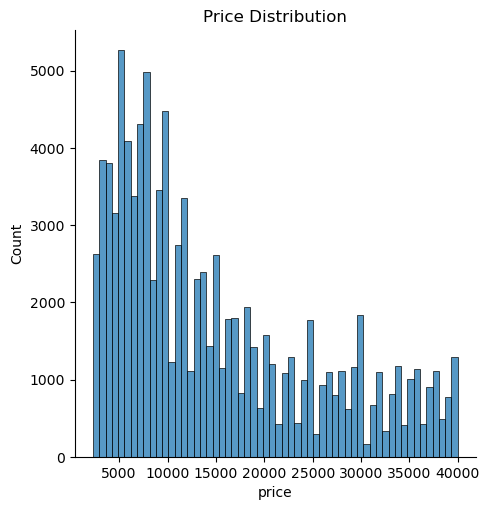

In [1098]:
sns.displot(vech_df.price)
plt.tight_layout()
plt.title("Price Distribution")
plt.show()

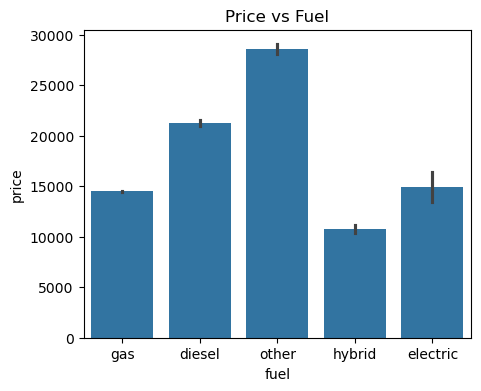

In [1099]:
fig,axs=plt.subplots()
fig.set_size_inches(5,4)

p1=sns.barplot(x='fuel',y='price',data=vech_df,ax=axs)
plt.title("Price vs Fuel")
plt.show()

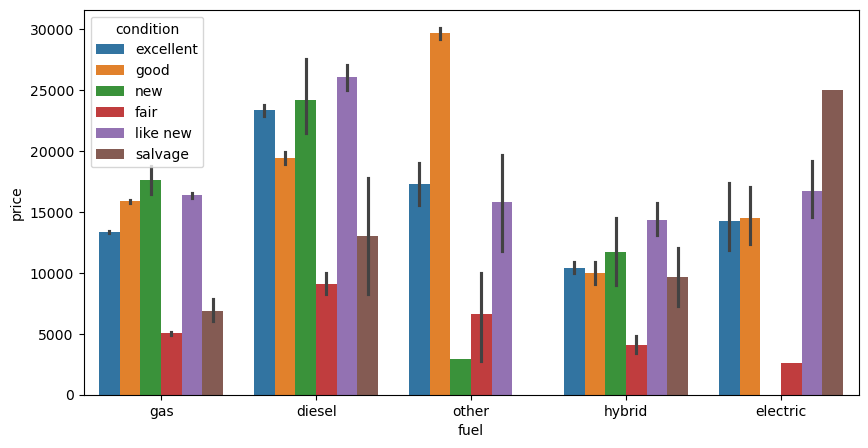

In [1100]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=vech_df)
plt.show()

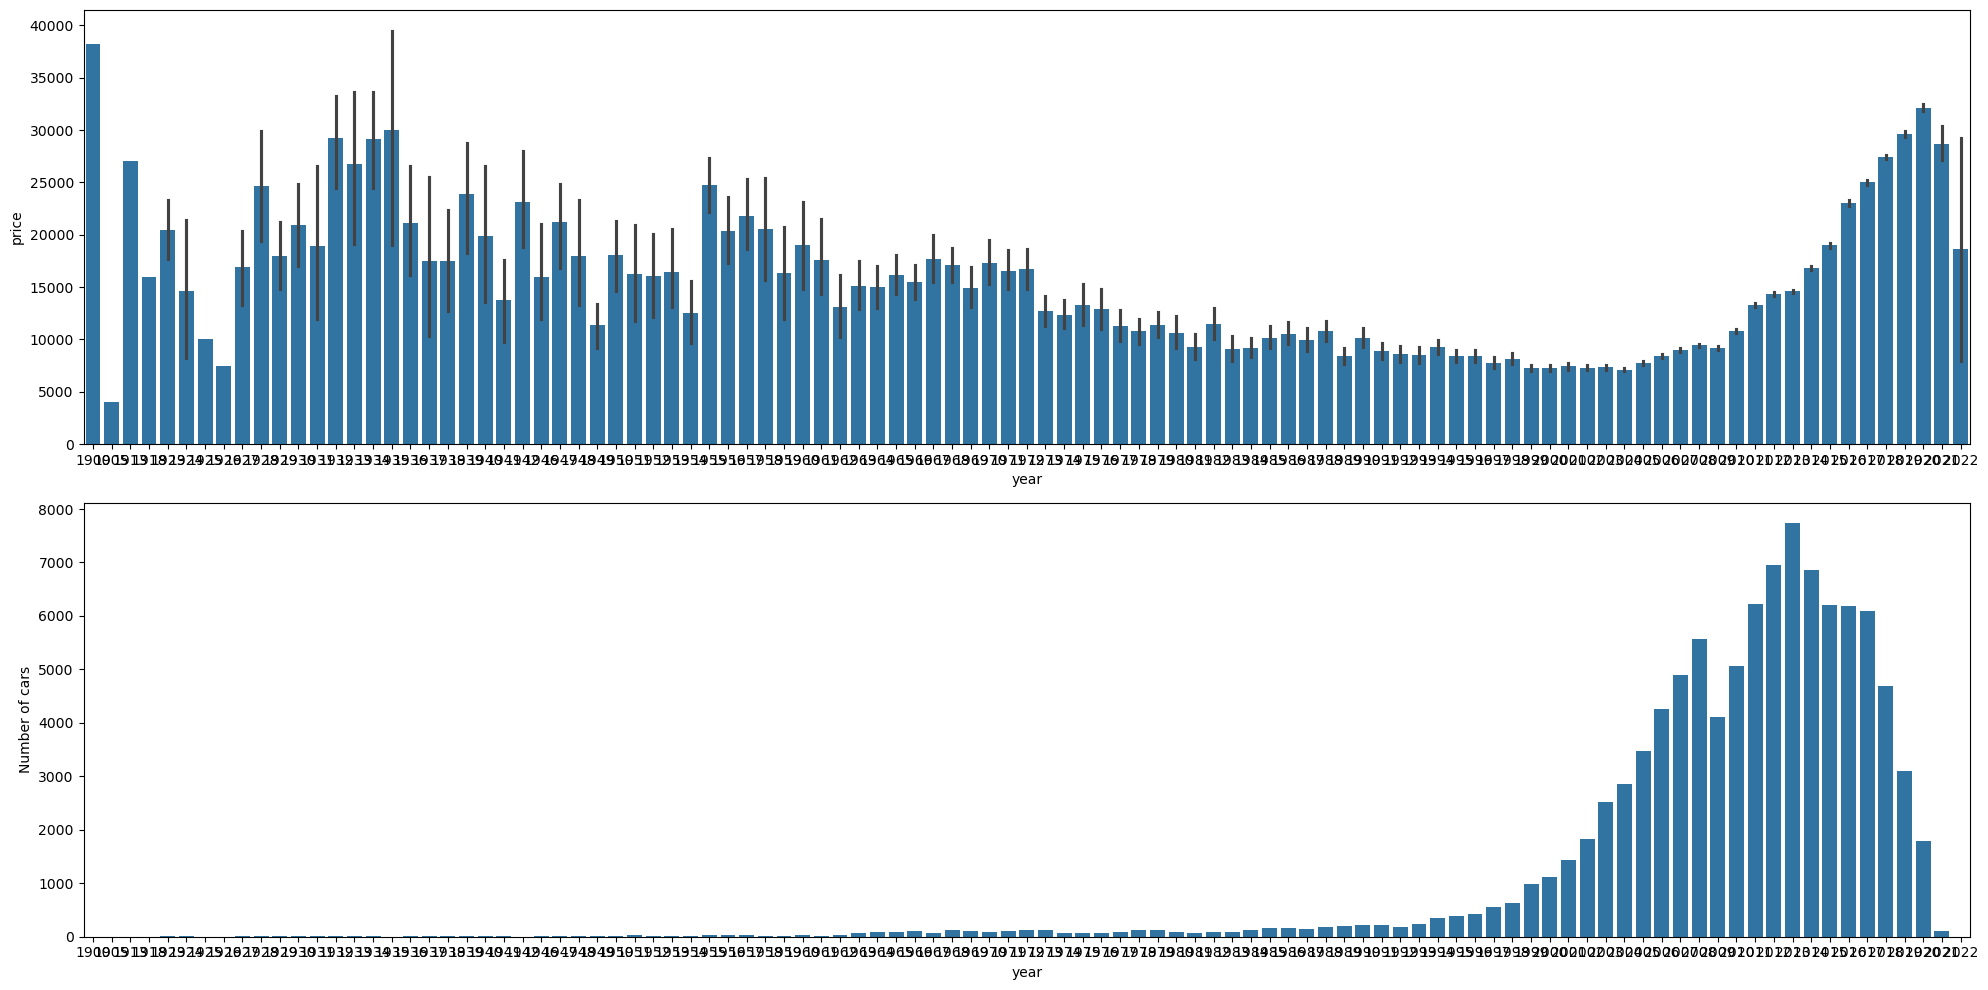

In [1063]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='year',y='price',data=vech_df,ax=axs[0])
sns.barplot(x=vech_df.groupby('year').count()['price'].index, 
            y=vech_df.groupby('year').count()['price'].values, 
            ax=axs[1])

axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.show()

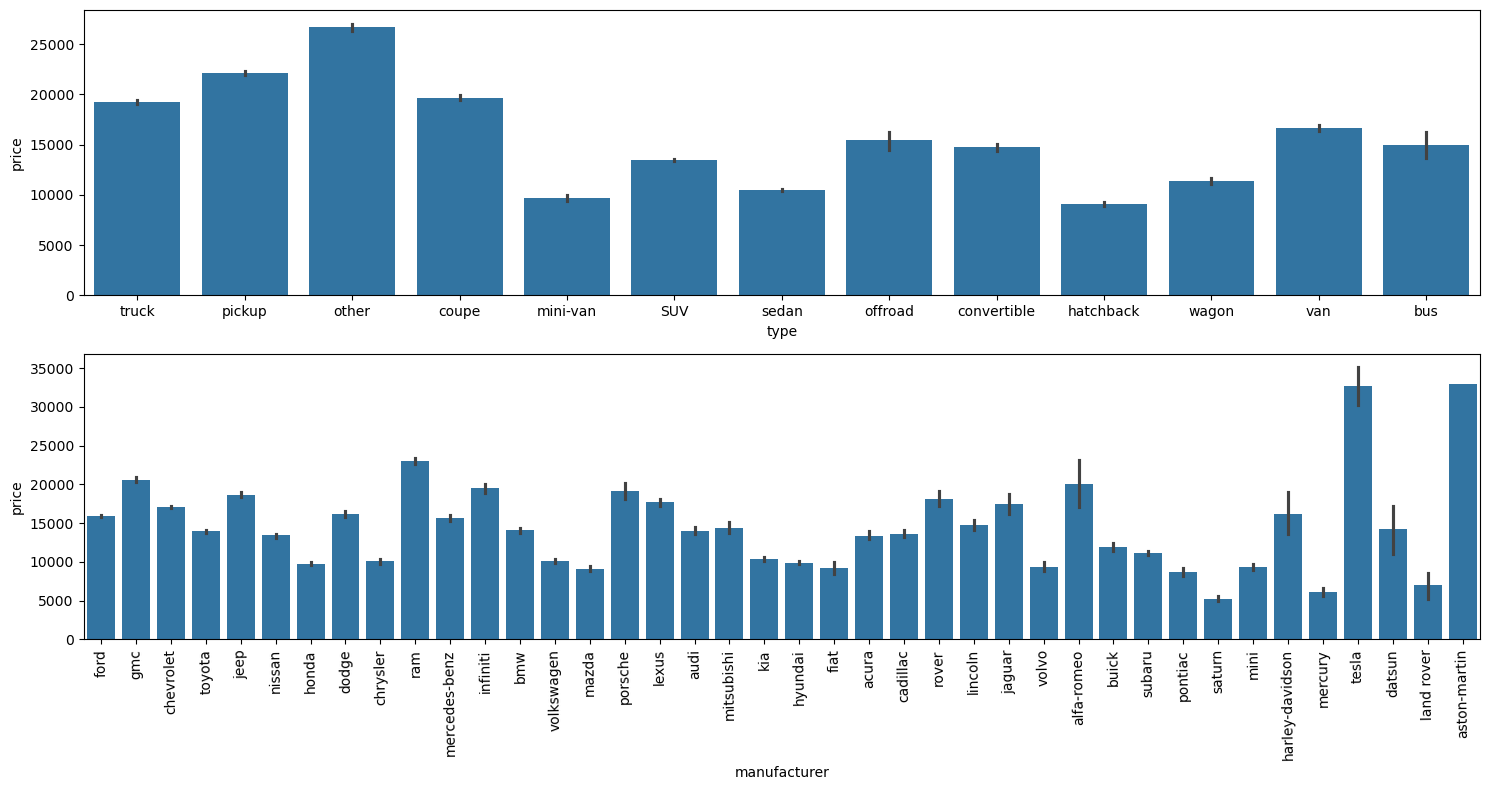

In [1102]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=vech_df,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=vech_df,ax=axs[1])
axs[1].set_xticklabels(vech_df.manufacturer.unique(),rotation=91)
plt.tight_layout()
plt.show()

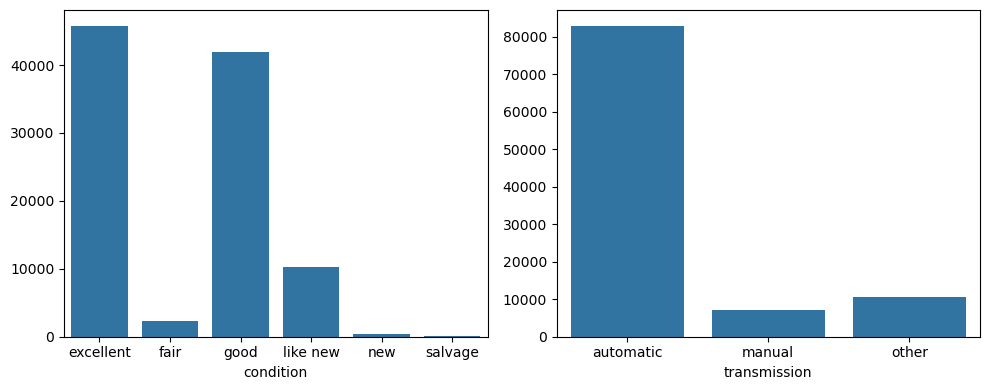

In [1103]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

# For the first plot
sns.barplot(x=vech_df.groupby('condition').count()['price'].index,
            y=vech_df.groupby('condition').count()['price'].values,
            ax=axs[0])

# For the second plot
sns.barplot(x=vech_df.groupby('transmission').count()['price'].index,
            y=vech_df.groupby('transmission').count()['price'].values,
            ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.show()

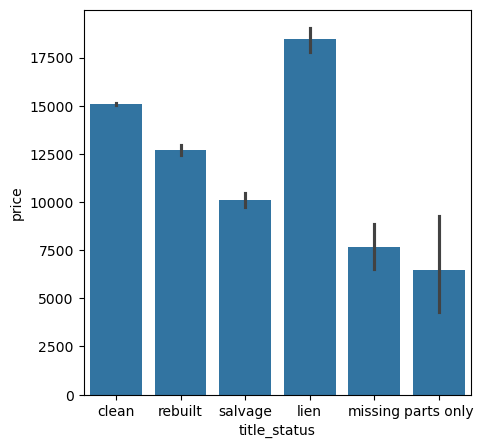

In [1104]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)


p1=sns.barplot(x='title_status',y='price',data=vech_df,ax=axs)

plt.show()

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1105]:
vech_df.dropna().shape  

(100768, 15)

In [1106]:
vech_df.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

In [1107]:
#categorical and numerical features. 
cat_col = vech_df.select_dtypes(include=['object', 'category']).columns
num_col = vech_df.select_dtypes(include = ['int64','float64']).columns 
display ("Categorical Columns are:", cat_col)
display ("Numerical Columns are:", num_col)

'Categorical Columns are:'

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')

'Numerical Columns are:'

Index(['price', 'odometer'], dtype='object')

## Handling Non-Numeric Columns

In [1108]:
vech_df['condition'] = vech_df['condition'].map({'excellent': 5,
                                       'new': 4.5, # mean age of new cars' ~9 -- could be false labelling
                                       'good': 4,
                                       'like new':3,
                                       'fair': 2,
                                       'salvage': 1,
                                       'unknown': 0})

vech_df['cylinders'] = vech_df['cylinders'].map({'12 cylinders': 12,
                                       '10 cylinders': 10,
                                       '8 cylinders': 8,
                                       '6 cylinders':6,
                                       '5 cylinders': 5,
                                       '4 cylinders': 4,
                                       '3 cylinders': 3,
                                       'other': 1, # not sure what it means -- more than 12 or less than 3?
                                       'unknown': 1 }) # a car must have at least one cylinder



In [1119]:
# Check for unique values for each features 
vech_df.nunique()

region            403
price            4168
year              101
manufacturer       40
model           10334
condition           6
cylinders           8
fuel                5
odometer        33557
title_status        6
transmission        3
drive               3
type               13
paint_color        12
state              51
age               101
dtype: int64

In [1120]:
# Remove old cars and create an age column
#To check car's age for clear correlation

vech_df['age'] = 2000 - vech_df['year'] 

vech_df[['age', 'price', 'odometer']].corr()

,age,price,odometer
age,1.00,-0.35,0.15
price,-0.35,1.00,-0.22
odometer,0.15,-0.22,1.00


In [1121]:
vech_df.price.min()

2300

In [1122]:
vech_df.price.max()

39990

In [1123]:
#df.drop(columns = ['region', 'state', 'model'], inplace = True)

In [1124]:
#categorical and numerical features. 
cat_col = vech_df.select_dtypes(include=['object', 'category']).columns
num_col = vech_df.select_dtypes(include = ['int64','float64']).columns 
display ("Categorical Columns are:", cat_col)
display ("Numerical Columns are:", num_col)

'Categorical Columns are:'

Index(['region', 'manufacturer', 'model', 'fuel', 'title_status',
       'transmission', 'drive', 'type', 'paint_color', 'state'],
      dtype='object')

'Numerical Columns are:'

Index(['price', 'condition', 'cylinders', 'odometer'], dtype='object')

In [1125]:
for col in ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']:
    counts = vech_df[col].value_counts()
    perc = vech_df[col].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
    nas = vech_df[col].isna().sum()
    print(col)
    print(((vech_df[col].isna().sum() / vech_df.shape[0]).round(2)*100).astype(str).split('.')[0], '% of the columns is na')
    print(pd.DataFrame({'count': counts, 'percentage': perc}), '\n\n')

manufacturer
0 % of the columns is na
                 count percentage
manufacturer                     
ford             17644      17.5%
chevrolet        15240      15.1%
toyota            8919       8.9%
honda             6045       6.0%
nissan            5638       5.6%
jeep              5081       5.0%
gmc               4113       4.1%
dodge             3630       3.6%
ram               3238       3.2%
bmw               2818       2.8%
subaru            2523       2.5%
mercedes-benz     2465       2.4%
hyundai           2372       2.4%
volkswagen        2177       2.2%
lexus             2012       2.0%
chrysler          1791       1.8%
kia               1787       1.8%
cadillac          1405       1.4%
infiniti          1333       1.3%
buick             1326       1.3%
mazda             1228       1.2%
audi              1143       1.1%
acura             1072       1.1%
lincoln            964       1.0%
pontiac            805       0.8%
mitsubishi         804       0.8%
volvo     

1. Majority of the cars are manufactured by ford or chevrolet.
2. The condition of 45% of the cars is excellent. Among the condition-known cars, almost half of them are in good or excellent shape.
3. The cyclinder counts most of them has 4 or 6 cylinders.
4. Great majority of the cars's fuel is gas.
5. Almost every car is stated as clean. (title_status)
6. Majority of the cars have automatic trasmission.
7. The drive type of almost half of them are 4 wheel drive.
8. The type of most cars is sedan and SUV.
9. The color of most of the cars is white and black.

0 % of the columns is na
For more clear histogram, 1173 rows with price bigger than 39590 ignored.


<Axes: >

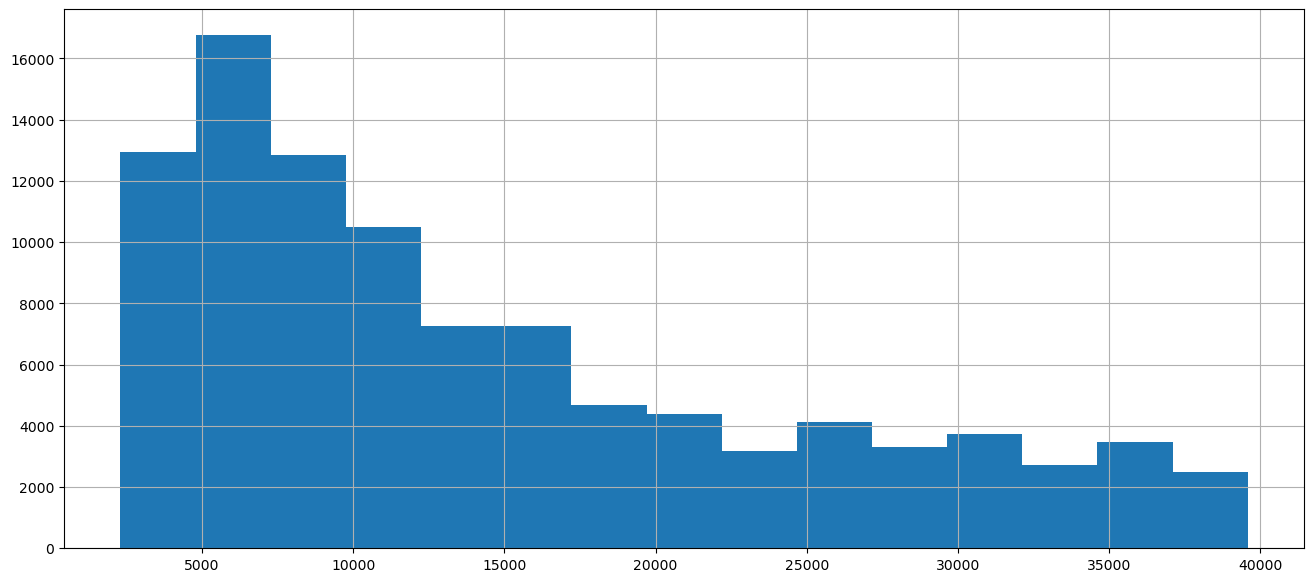

In [1126]:
print(((vech_df['price'].isna().sum() / vech_df.shape[0]).round(2)*100).astype(str).split('.')[0], '% of the columns is na')
print('For more clear histogram,', vech_df[vech_df.price >= vech_df.price.quantile(0.99)].shape[0], 'rows with price bigger than', vech_df[vech_df.price >= vech_df.price.quantile(0.99)].price.min(), 'ignored.')
vech_df[vech_df.price < vech_df.price.quantile(0.99)].price.hist(bins = 15, figsize = (16,7))

0 % of the columns is na
For more clear histogram, 1009 rows with age bigger than 33 ignored.


<Axes: >

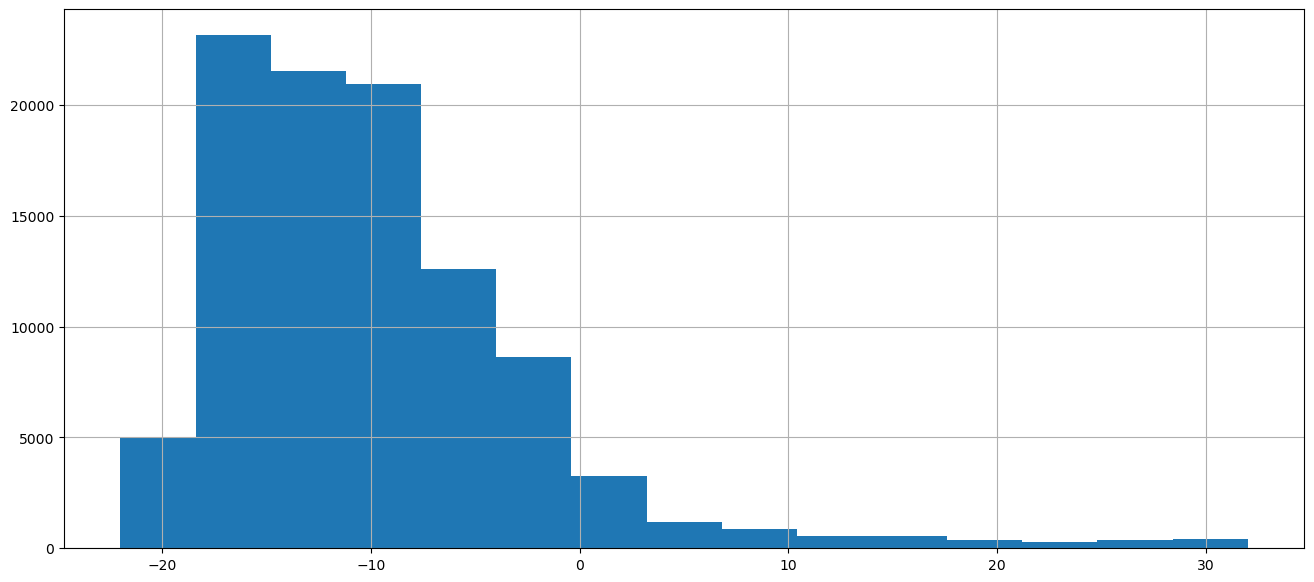

In [1127]:
print(((vech_df['age'].isna().sum() / vech_df.shape[0]).round(2)*100).astype(str).split('.')[0], '% of the columns is na')
print('For more clear histogram,', vech_df[vech_df.age >= vech_df.age.quantile(0.99)].shape[0], 'rows with age bigger than', vech_df[vech_df.age >= vech_df.age.quantile(0.99)].age.min(), 'ignored.')
vech_df[vech_df.age < vech_df.age.quantile(0.99)].age.hist(bins = 15, figsize = (16,7))

In [1128]:
# Since 'fuel', 'title_status', 'transmission', 'price', 'age' and 'odometer' has small percentage of nas, dropping rows without them.
# Also, 'price' shouldn't be na for the model.
vech_df = vech_df[vech_df.fuel.notna() & vech_df.title_status.notna() & vech_df.transmission.notna() & vech_df.price.notna() & vech_df.age.notna() & vech_df.odometer.notna()]
vech_df.shape

(100768, 16)

In [1129]:
vech_df.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
31,auburn,15000,2013,ford,f-150 xlt,5.00,6,gas,"128,000.00",clean,automatic,rwd,truck,black,al,-13
32,auburn,27990,2012,gmc,sierra 2500 hd extended cab,4.00,8,gas,"68,696.00",clean,other,4wd,pickup,black,al,-12


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [1130]:
temp = pd.DataFrame(vech_df.manufacturer.value_counts())
print('Manufacturer column has', vech_df['manufacturer'].nunique(), 'unique values.')

Manufacturer column has 40 unique values.


In [1131]:
temp = pd.DataFrame(vech_df.model.value_counts())
print('Model column has', vech_df['model'].nunique(), 'unique values.')

Model column has 10334 unique values.


## Handling Minority Values

In [1022]:
"""
# based on information gained last cells of Data Understanding, small data of model and manufacturer is grouping.
# Group small manufacturers
temp = pd.DataFrame(vech_df['manufacturer'].value_counts())
temp.columns = ['count']   # rename for clarity
vech_df['manufacturer'] = vech_df['manufacturer'].replace(list(temp[temp['count'] < 1385].index), 'other')

# Group small models
temp = pd.DataFrame(vech_df['model'].value_counts())
temp.columns = ['count']
vech_df['model'] = vech_df['model'].replace(list(temp[temp['count'] < 1000].index), 'other')
"""

In [1003]:
#vech_df['manu_model'] = vech_df['manufacturer'] + vech_df['model']
#df = pd.get_dummies(df, columns = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color'])

## Spliting

In [1132]:
# train - 80%, test - 20%
X = vech_df.drop(columns = ['price'])
y = vech_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)
#X_val, X_test, y_val, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42, shuffle = True)

## Scaling

In [1133]:
X_train_scaled = X_train
X_test_scaled = X_test
    
scaler = StandardScaler()
X_train_scaled[['odometer', 'age']] = scaler.fit_transform(X_train[['odometer', 'age']])
X_test_scaled[['odometer', 'age']] = scaler.transform(X_test[['odometer', 'age']])

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Linear Regression

In [1134]:
# keep only numeric columns - LINEAR
X_train_num = X_train.select_dtypes(include=['number'])
X_test_num  = X_test.select_dtypes(include=['number'])

lr_model = LinearRegression(fit_intercept=True).fit(X_train_num, y_train) # Fit and evaluate
print('MAE:', mean_absolute_error(y_test, lr_model.predict(X_test_num)))

MAE: 6646.270268929245


In [1135]:
# RIDGE

lr_model = LinearRegression(fit_intercept=True).fit(X_train_num, y_train) # Fit and evaluate
y_pred = lr_model.predict(X_test_num)
print('Best Parameters:', gscv_ridge_model.best_params_) 
print('MAE:', mean_absolute_error(y_test, y_pred))

Best Parameters: {'alpha': 0.0}
MAE: 6646.270268929245


In [1136]:
# GridSearchCV on Ridge's alpha parameter
gscv_ridge_model = GridSearchCV(Ridge(), param_grid = {'alpha': np.linspace(0, 1, 10)}, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, verbose = 3).fit(X_train_num, y_train)
print('Best Parameters:', gscv_ridge_model.best_params_) 
print('MAE:', mean_absolute_error(y_test, gscv_ridge_model.predict(X_test_num)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 0.0}
MAE: 6665.380619231914


In [1137]:
#Lasso
lasso_model = Lasso(alpha=0.1).fit(X_train_num, y_train)
print('MAE:', mean_absolute_error(y_test, lasso_model.predict(X_test_num)))


MAE: 6683.8828822425985


In [1010]:
# GridSearchCV on Lasso's alpha parameter
gscv_lasso_model = GridSearchCV(Lasso(), param_grid = {'alpha': np.linspace(0, 1, 10)}, scoring='neg_mean_absolute_error', cv=5, n_jobs=3, verbose = 3).fit(X_train_num, y_train)
print('Best Parameters:', gscv_lasso_model.best_params_) 
print('MAE:', mean_absolute_error(y_test, gscv_lasso_model.predict(X_test_num)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 0.0}
MAE: 6795.294320044555


In [1139]:
# GridSearchCV on Lasso's alpha parameter
gscv_lasso_model = GridSearchCV(Lasso(), param_grid = {'alpha': np.linspace(0, 1, 10)}, scoring='neg_mean_absolute_error', cv=5, n_jobs=3, verbose = 3).fit(X_train_num, y_train)
print('Best Parameters:', gscv_lasso_model.best_params_) 
print('MAE:', mean_absolute_error(y_test, gscv_lasso_model.predict(X_test_num)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 0.0}
MAE: 6683.8454212193465


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
I tried Linear Regression, Ridge and Lasso models with different features combinations. As summary, First, I eliminated minorities in model and manufacturer (code commented in Handling with Minorities section). With this version on model and manufacturer:
Directly turning them into dummies gives MAE: 176248
Combining them as one column ('manufacturer_model') and using as dummies 
Without manufacturer, just using model column by turning into dummies
Without model, just using manufacturer column by turning into dummies 
Then, I started to play with variety of model column.
Increasing 500 limit on model column to 1000 
Decreasing 500 limit on model column to 300 
After these, I realized that less number of columns is better for the model.
So, as last attempt, I didn't use model column and just go with manufacturer. With this way, MAE: 159538
As last step, I run parameter search (on 'alpha') with cv = 5 on both Lasso and Ridge models. Final model Lasso with alpha = 1 has MAE: 6683.85

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### <i> Summary of Insights: <i>
<p><i>
    <li> Older cars are slightly cheaper than new ones. </li>
    <li> Majority of the cars are manufactured by ford or chevrolet. </li>
    <li> Great majority of the cars's fuel is gas. </li>
    <li> Almost every car is stated as clean. </li>
    <li> Most of the cars are younger than 15 years old. </li>
    <li> 65% of the cars has odometer value smaller than 50.000. </li>
</i>

### <i> Result: <i>
<i> <p> Manufacturer being volvo or toyota, type being pickup, trasmission being manual and diesel as fuel </b> has have strong effect on a car's price, in a positive way. <b> Type being offroad, manufacturer being ram or datsun or harley-davidson </b>, also, have strong effect on a car's price but in a bad way. </i>
<p> <i> A volvo pickup type diesel car with manual transmission can be sold for more. <br> A datsun offroad type hybrid car would sell for lower price. </br> </i>
<p> <b> Thus, we can state that, mostly, car's manufacturer and type drives its price. </b>